In [ ]:
# This is the second part of (2/2), final project of Harris-IPPP Fall 2017
# Authors are:
    #Tianyuan Bai
    #Yuanlong Liu
    
#everything is similar to the first part, until,

In [30]:
import pandas as pd

import numpy as np

from matplotlib import pyplot as plt

import csv

import seaborn as sns

import statsmodels.formula.api as sm

In [31]:
country=pd.read_csv("country.csv")
dictobj = csv.DictReader(open("country.csv"))


#HERE. We imported the edited version of soccer data, without outliers. 

soccer=pd.read_csv("No outlier.csv")
dictobj = csv.DictReader(open("No outlier.csv"))

mergedsheet2 = pd.merge(country,
                    soccer,
                    on='Country')

In [32]:
print(mergedsheet2)

           Country    2011GDP    2016GDP  GDP Log Change  2011 Inflation  \
0        Argentina    447.644    544.735        0.216893           9.775   
1          Austria    419.243    386.587       -0.077893           3.600   
2          Belgium    513.396    466.559       -0.091230           3.469   
3           Brazil   2,492.91   1,798.62       -0.278506           6.636   
4         Bulgaria     53.514      52.39       -0.021004           3.389   
5            China   7,298.15  11,232.11        0.539035           5.417   
6          Croatia     63.842     50.731       -0.205366           2.260   
7           Cyprus     24.949      19.81       -0.205980           3.486   
8   Czech Republic    215.265    195.328       -0.092616           1.929   
9          Denmark    333.238    306.734       -0.079535           2.757   
10           Egypt    235.719    332.349        0.409937          11.068   
11          France   2,776.32   2,466.47       -0.111605           2.293   
12         G

In [33]:
mergedsheet2.plot(kind='scatter', x = 'GDP Log Change', y = 'Expenditure log change')


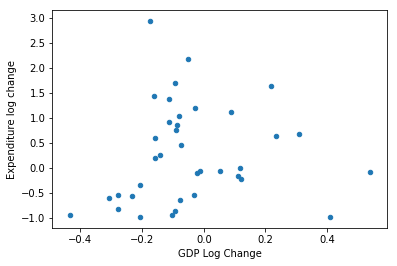

In [34]:
plt.show()

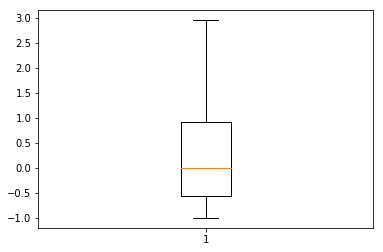

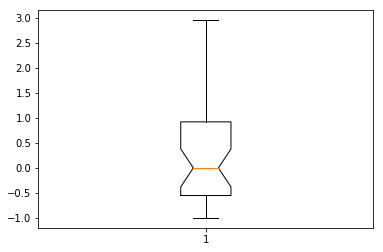

In [35]:
#As a verification, there're no outliers shown in the boxplot.

plt.boxplot(mergedsheet2['Expenditure log change'])
plt.show()

plt.boxplot(mergedsheet2['Expenditure log change'], ['GDP Log Change'])
plt.show()

In [36]:
Y = mergedsheet2['Expenditure log change']
X1 = mergedsheet2['GDP Log Change']
X2 = mergedsheet2['Inflation Log Change']
X3 = mergedsheet2['Unemployment Log Change']
X4 = mergedsheet2['Europe']
X5 = mergedsheet2['Asia']
X6 = mergedsheet2['America']

model = sm.ols(formula = 'Y ~ X1+ X2 + X3 + X4 + X5 + X6', data = mergedsheet2).fit()

In [38]:
model.summary()


#this new model shows an improved R-square, from previously 0.242, to here 0.389. This model explains much better 
    #without the data from the excluded 3 countries. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     3.187
Date:                Fri, 01 Dec 2017   Prob (F-statistic):             0.0153
Time:                        16:11:25   Log-Likelihood:                -42.196
No. Observations:                  37   AIC:                             98.39
Df Residuals:                      30   BIC:                             109.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8009      0.486     -1.649      0.110      -1.793       0.191
X1             0.9165      0.787      1.164      0.254      -0.692       2.525
X2             0.0669      0.153      0.436      0.666      -0.247       0.380
X3            -1.2014      0.453     -2.652      0.013      -2.126      -0.276
X4             1.4251      0.541      2.633      0.013       0.320       2.531
X5             0.1333      0.628      0.212      0.833      -1.149       1.416
X6             1.3134      0.660      1.989      0.056      -0.035       2.662
==============================================================================
Omnibus:                        8.519   Durbin-Watson:                   1.225
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                7.265
Skew:                           0.917   Prob(JB):                       0.0264
Kurtosis:                       4.160   Cond. No.                         10.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

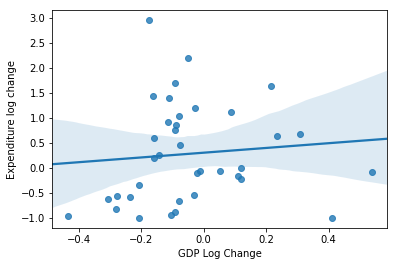

In [39]:
sns.regplot(data = mergedsheet2, x = X1, y = Y)
plt.show()

#more importantly, the correlation between GDP growth and Soccer investment becomes positive without the outliers, 
    #which makes more sense. With more economic improvement, the spending into soccer also increases. Hence The Soccer market 
        #outliers significantly downplayed the effect of economic activities on soccer. 